In [1]:
# Before importing a file we can have a look to it (probably this command won't work in Windows)
# mpg.csv is a car database
# mpg: miles per gallon, displ: engine displacement in liters
# cty: city mpg, cyl: num of cilynders, hwy: highway mpg
# drv:  = front-wheel drive, r = rear wheel drive, 4 = 4wd
# fl: fuel (e = ethanol E85, d = diesel, r = regular, p = premium, c= CNG)
! head mpg.csv

"id","manufacturer","model","displ","year","cyl","trans","drv","cty","hwy","fl","class"
"1","audi","a4",1.8,1999,4,"auto(l5)","f",18,29,"p","compact"
"2","audi","a4",1.8,1999,4,"manual(m5)","f",21,29,"p","compact"
"3","audi","a4",2,2008,4,"manual(m6)","f",20,31,"p","compact"
"4","audi","a4",2,2008,4,"auto(av)","f",21,30,"p","compact"
"5","audi","a4",2.8,1999,6,"auto(l5)","f",16,26,"p","compact"
"6","audi","a4",2.8,1999,6,"manual(m5)","f",18,26,"p","compact"
"7","audi","a4",3.1,2008,6,"auto(av)","f",18,27,"p","compact"
"8","audi","a4 quattro",1.8,1999,4,"manual(m5)","4",18,26,"p","compact"
"9","audi","a4 quattro",1.8,1999,4,"auto(l5)","4",16,25,"p","compact"


### Importing a csv as a pandas Dataframe object

In [2]:
# imports a csv file as a Dataframe and shows the first records
import pandas as pd
import numpy as np
cars = pd.read_csv("mpg.csv", index_col=0)

In [66]:
# viewing the top rows
cars.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
id,,,,,,,,,,,
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [67]:
# viewing the bottom rows
cars.tail()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
id,,,,,,,,,,,
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize
234,volkswagen,passat,3.6,2008,6,auto(s6),f,17,26,p,midsize


In [8]:
# getting a few rows using slice
cars[:3]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
id,,,,,,,,,,,
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


In [11]:
# selecting a column
# this returns a Series object
cars['year'].head()

id
1    1999
2    1999
3    2008
4    2008
5    1999
Name: year, dtype: int64

In [13]:
# we can chain both 
# and it works no matter which direction we do it
cars ['year'][:3]

id
1    1999
2    1999
3    2008
Name: year, dtype: int64

In [19]:
# in the same way we can slice multiple columns
cars[['year','cty','hwy']][:3]

,year,cty,hwy
id,,,
1,1999,18,29
2,1999,21,29
3,2008,20,31


In [23]:
# we can count values with value_counts
cars['cty'].value_counts()

18    26
15    24
21    23
13    21
19    20
11    20
14    19
16    19
17    16
20    11
12     8
9      5
24     5
22     4
23     3
26     3
25     2
28     2
33     1
29     1
35     1
Name: cty, dtype: int64

line_width has been deprecated, use display.width instead (currently both are
identical)



/home/jcano/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2847: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


/home/jcano/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


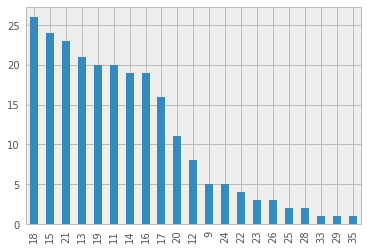

In [28]:
cty_count = cars['cty'].value_counts()

# make the graph a bit prettier and bigger
pd.set_option('display.mpl_style', 'default') 
pd.set_option('display.line_width', 5000) 
pd.set_option('display.max_columns', 60) 
# pd.figsize(15, 5)

cty_count.plot(kind='bar')

### Getting help

In [21]:
# we can get some help for any command
# a pop-up window will emerge
cars.index?

In [5]:
# return the index of the dataframe
# Do not confuse index and position!!!
# the first index is located a index-position = 0
cars.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            225, 226, 227, 228, 229, 230, 231, 232, 233, 234],
           dtype='int64', name='id', length=234)

In [4]:
# return the labels for the columns in the dataframe
cars.columns

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'class'],
      dtype='object')

In [39]:
# copy a Dataframe using the copy method
# Never use the equal operator alone to copy a Dataframe!
cars_copy = cars.copy()
cars_copy.head()

,manufacturer,model,displ,year,cyl,drv,cty(mpg),hwy,fl,class,cyl-displ,color
id,,,,,,,,,,,,
1,audi,a4,1.8,1999,4,f,18,29,p,compact,0.450000,None
2,audi,a4,1.8,1999,4,f,21,29,p,compact,0.450000,None
3,audi,a4,2.0,2008,4,f,20,31,p,compact,0.500000,None
4,audi,a4,2.0,2008,4,f,21,30,p,compact,0.500000,None
5,audi,a4,2.8,1999,6,f,16,26,p,compact,0.466667,None


In [41]:
# Do not use the equal operator to copy a Dataframe!
# This has side-effects (it's not a copy but a reference!)
cars_copy = cars
del cars_copy['trans']
cars.head()

,manufacturer,model,displ,year,cyl,drv,cty,hwy,fl,class
id,,,,,,,,,,
1,audi,a4,1.8,1999,4,f,18,29,p,compact
2,audi,a4,1.8,1999,4,f,21,29,p,compact
3,audi,a4,2.0,2008,4,f,20,31,p,compact
4,audi,a4,2.0,2008,4,f,21,30,p,compact
5,audi,a4,2.8,1999,6,f,16,26,p,compact


In [42]:
# we can add a new empty column.
# WARNING: it takes inmidate effect on the Dataframe. Does not return a view!
cars['color'] = None
cars.head()

,manufacturer,model,displ,year,cyl,drv,cty,hwy,fl,class,color
id,,,,,,,,,,,
1,audi,a4,1.8,1999,4,f,18,29,p,compact,None
2,audi,a4,1.8,1999,4,f,21,29,p,compact,None
3,audi,a4,2.0,2008,4,f,20,31,p,compact,None
4,audi,a4,2.0,2008,4,f,21,30,p,compact,None
5,audi,a4,2.8,1999,6,f,16,26,p,compact,None


In [10]:
# columns can be removed as well
# axis = 1, indicates to drop columns
# inplace, makes the changes permanent
# another method is del. Check the documentation
cars.drop('color', inplace=True, axis = 1)
cars.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
id,,,,,,,,,,,
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [43]:
#we can do operations with columns
cars['cyl-displ'] = cars['displ']/cars['cyl']
cars.head()

,manufacturer,model,displ,year,cyl,drv,cty,hwy,fl,class,color,cyl-displ
id,,,,,,,,,,,,
1,audi,a4,1.8,1999,4,f,18,29,p,compact,None,0.450000
2,audi,a4,1.8,1999,4,f,21,29,p,compact,None,0.450000
3,audi,a4,2.0,2008,4,f,20,31,p,compact,None,0.500000
4,audi,a4,2.0,2008,4,f,21,30,p,compact,None,0.500000
5,audi,a4,2.8,1999,6,f,16,26,p,compact,None,0.466667


In [46]:
# Renaming a column is possible:
cars = cars.rename(columns={'cty': 'cty(mpg)', 'hwy': 'hwy(mpg)'})
cars.head()

,manufacturer,model,displ,year,cyl(l),drv,cty(mpg),hwy(mpg),fl,class,color,cyl-displ
id,,,,,,,,,,,,
1,audi,a4,1.8,1999,4,f,18,29,p,compact,None,0.450000
2,audi,a4,1.8,1999,4,f,21,29,p,compact,None,0.450000
3,audi,a4,2.0,2008,4,f,20,31,p,compact,None,0.500000
4,audi,a4,2.0,2008,4,f,21,30,p,compact,None,0.500000
5,audi,a4,2.8,1999,6,f,16,26,p,compact,None,0.466667


### Index operations

In [18]:
# pandas does not require that values in the index are unique
# so we can use the manufacturer column as an index
# the old index, will be copied to a column
# changes take inmediate effect
copy_cars = cars.copy()
copy_cars = copy_cars.set_index('manufacturer')
copy_cars.head()

,model,displ,year,cyl,trans,drv,cty(mpg),hwy,fl,class,cyl-displ
manufacturer,,,,,,,,,,,
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,0.450000
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,0.450000
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,0.500000
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,0.500000
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,0.466667


In [105]:
# we can use multi-level indexing as well
columns_to_keep = ['manufacturer', 'model', 'displ','year','cyl','trans']
copy_cars = cars[columns_to_keep].copy()
#copy_cars = copy_cars.reset_index()
copy_cars = copy_cars.set_index(['manufacturer','model'])
copy_cars.head()

displ  year  cyl       trans
manufacturer model                              
audi         a4       1.8  1999    4    auto(l5)
             a4       1.8  1999    4  manual(m5)
             a4       2.0  2008    4  manual(m6)
             a4       2.0  2008    4    auto(av)
             a4       2.8  1999    6    auto(l5)

In [106]:
# verify the new index
copy_cars.index[0]

('audi', 'a4')

In [107]:
# reseting the index
# but check that the older numeric index wasn't an automatic index
# it was a id, so in this example they don't match.
copy_cars = copy_cars.reset_index()
copy_cars.head()

,manufacturer,model,displ,year,cyl,trans
0,audi,a4,1.8,1999,4,auto(l5)
1,audi,a4,1.8,1999,4,manual(m5)
2,audi,a4,2.0,2008,4,manual(m6)
3,audi,a4,2.0,2008,4,auto(av)
4,audi,a4,2.8,1999,6,auto(l5)


### Querying a Dataframe

In [ ]:
# selection by position with iloc
# iloc [index] returns a Series object with the data located at index=[index]
# the first axis (row) is index=0, the second axis is index=1, etc
cars.iloc[1]

In [71]:
# we can use iloc to slice the DataFrame 
# we get another DataFrame (a view!)
cars.iloc[1:3]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
id,,,,,,,,,,,
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


In [ ]:
# another way of slicing the DataFrame
cars.iloc[[1,3]]

In [ ]:
# we can use iloc to get a particular data located at coordinates row,column
# remember that pandas start to count with value 0
cars.iloc[1][3] # also cars.ilo[1,3]

In [ ]:
# selection by label with loc
# loc returns the axis with index=[value]
# if there are more than one records with that index, it will return all of them
cars.loc['audi'].head()

In [ ]:
# return the column 'manufacturer' as a Series object.
cars["year"].head()

In [70]:
# slicing by rows
# similar to iloc
cars [0:3].head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
id,,,,,,,,,,,
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


In [ ]:
# returns a numpy array of unique elements in "manufacturer" column
cars["year"].unique()

In [ ]:
# returns a Series object containing the third axis (row) of data in the dataframe Cars
print (cars.iloc[3])
print (type(cars.iloc[3]))

In [ ]:
cars.loc['audi','cty'].unique()

In [ ]:
# we can drop (remove) records with index = audi
cars.drop('audi').head()

In [ ]:
# again the DataFrame has not changed, this is just a view
cars.head()

In [ ]:
# we can reset the index
cars = cars.reset_index()
cars.head()

In [72]:
# Boolean indexing
# returns a filtereed view of the Dataframe
# here we get all the records whose cyl is less than 1.8
# again this is just a view
cars[cars['displ'] < 1.8]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
id,,,,,,,,,,,
100,honda,civic,1.6,1999,4,manual(m5),f,28,33,r,subcompact
101,honda,civic,1.6,1999,4,auto(l4),f,24,32,r,subcompact
102,honda,civic,1.6,1999,4,manual(m5),f,25,32,r,subcompact
103,honda,civic,1.6,1999,4,manual(m5),f,23,29,p,subcompact
104,honda,civic,1.6,1999,4,auto(l4),f,24,32,r,subcompact


## Advanced operations

In [47]:
import pandas as pd

# load the file olypics.csv as a dataframe
df = pd.read_csv("olympics.csv", index_col=0, skiprows=1)
df.head()

,№ Summer,01 !,02 !,03 !,Total,№ Winter,01 !.1,02 !.1,03 !.1,Total.1,№ Games,01 !.2,02 !.2,03 !.2,Combined total
Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


In [48]:
# do some cleaning
# iterating through the columns
for col in df.columns:
    if col[:2]=='01':
        df.rename(columns={col:'Gold'+col[4:]}, inplace=True)
    if col[:2]=='02':
        df.rename(columns={col:'Silver'+col[4:]}, inplace=True)
    if col[:2]=='03':
        df.rename(columns={col:'Bronze'+col[4:]}, inplace=True)
    if col[:1]=='№':
        df.rename(columns={col:'#'+col[1:]}, inplace=True)

# Clean the index column 
names_ids = df.index.str.split('\s\(') # split the index by '('
df.index = names_ids.str[0] # the [0] element is the country name (new index)
# Add a new column with the ID of the country
df['ID'] = names_ids.str[1].str[:3] # the [1] element is the abbreviation or ID (take first 3 characters from that)

df = df.drop('Totals')
df.head()

,# Summer,Gold,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total,ID
Afghanistan,13,0,0,2,2,0,0,0,0,0,13,0,0,2,2,AFG
Algeria,12,5,2,8,15,3,0,0,0,0,15,5,2,8,15,ALG
Argentina,23,18,24,28,70,18,0,0,0,0,41,18,24,28,70,ARG
Armenia,5,1,2,9,12,6,0,0,0,0,11,1,2,9,12,ARM
Australasia,2,3,4,5,12,0,0,0,0,0,2,3,4,5,12,ANZ


In [ ]:
# iterating over every row in a dataframe
# this is usually slower than using groupby
for country in df.index.unique():
    #total = np.sum(df[df['Gold.2'] == country].dropna()[''])
    #print (country + ' has a total of  ' + str(total) + ' gold medals')

In [2]:
cars_copy = cars.copy()
cars_copy.groupby('manufacturer')['displ'].mean() 

manufacturer
audi          2.544444
chevrolet     5.063158
dodge         4.378378
ford          4.536000
honda         1.711111
hyundai       2.428571
jeep          4.575000
land rover    4.300000
lincoln       5.400000
mercury       4.400000
nissan        3.269231
pontiac       3.960000
subaru        2.457143
toyota        2.952941
volkswagen    2.255556
Name: displ, dtype: float64

In [115]:
cars_copy['manufacturer']

id
1            audi
2            audi
3            audi
4            audi
5            audi
6            audi
7            audi
8            audi
9            audi
10           audi
11           audi
12           audi
13           audi
14           audi
15           audi
16           audi
17           audi
18           audi
19      chevrolet
20      chevrolet
21      chevrolet
22      chevrolet
23      chevrolet
24      chevrolet
25      chevrolet
26      chevrolet
27      chevrolet
28      chevrolet
29      chevrolet
30      chevrolet
          ...    
205        toyota
206        toyota
207        toyota
208    volkswagen
209    volkswagen
210    volkswagen
211    volkswagen
212    volkswagen
213    volkswagen
214    volkswagen
215    volkswagen
216    volkswagen
217    volkswagen
218    volkswagen
219    volkswagen
220    volkswagen
221    volkswagen
222    volkswagen
223    volkswagen
224    volkswagen
225    volkswagen
226    volkswagen
227    volkswagen
228    volkswagen
229    